In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import visualization as vis
import data_manage as dm
import lrlo as lrlo

In [3]:
LOG_ROOT = 'data/logs/'
CSV_ROOT = 'data/csvs/'

In [4]:
backlog_path_masking = CSV_ROOT + "backlog_every_masking.csv"
latency_path_masking = CSV_ROOT + "latency_every_masking.csv"
backlog_path_unmasking = CSV_ROOT + "backlog_every_unmasking.csv"
latency_path_unmasking = CSV_ROOT + "latency_every_unmasking.csv"
log_dir_train = LOG_ROOT + "train/240318-184226_videopath_JK_rewardmethod_10_importantmethod_021_threshold_0.35"
log_dir_masking = LOG_ROOT + "test/JK-1_TEST_LOWEPS_Agent2_MASK_same_003"
log_dir_unmasking = LOG_ROOT + "test/JK-1_TEST_LOWEPS_Agent3_same_003"

In [5]:
color_list = ["tomato", "salmon", "darkorange", "gold", "forestgreen", "mediumseagreen", "cornflowblue", "royalblue", "steelblue", "slateblue"]

In [6]:
network_config = {
    "abilene" : {
        "node_num" : 11,
        "dest_node" : ["node 9", "node 10", "node 11"]
    },
    # TODO: config 받으면 그 떄 수정할 것
    "yolo" : {
        "node_num" : 3,
        "dest_node" : ["node 2"]
    }
}

### 1. Plot log Data

In [7]:
SKIP = True

In [8]:
# Load Data
tag_list = ["Network/Diff", "Network/send_a(t)", "Network/target_A(t)"]

train = dm.load_log(log_dir_train)
masking = dm.load_log(log_dir_masking, tag_list)
unmasking = dm.load_log(log_dir_unmasking, tag_list)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [9]:
if not SKIP:
    lrlo.plot_reward(train)
    lrlo.plot_comparison_reward([train, train], ['10', '11'])
    lrlo.plot_frame_barcode(masking, color="mediumseagreen")
    lrlo.plot_frame_barcode(unmasking, color="salmon")

In [10]:
if not SKIP:
    lrlo.plot_send(masking)
    lrlo.plot_fraction(masking)
    lrlo.plot_send_and_guide(masking)
    lrlo.plot_send_and_guide_as_fraction(masking)
    lrlo.plot_comparison_send([masking, unmasking], ["masking", "unmasking"])
    lrlo.plot_comparison_fraction([masking, unmasking], ["masking", "unmasking"])
    lrlo.plot_diff(masking)
    lrlo.plot_comparison_diff([masking, unmasking], ["masking", "unmasking"])

### 2. Plot OMNeT++ Data

In [11]:
# Load Data
latency_masking = dm.load_csv(latency_path_masking)
latency_masking_df = lrlo.parse_omnet_csv(latency_masking, 'latency', node_list=["node9", "node10", "node11"])
latency_unmasking = dm.load_csv(latency_path_unmasking)
latency_unmasking_df = lrlo.parse_omnet_csv(latency_unmasking, 'latency', node_list=["node9", "node10", "node11"])

backlog_masking = dm.load_csv(backlog_path_masking)
backlog_masking_df = lrlo.parse_omnet_csv(backlog_masking, 'backlog')
backlog_unmasking = dm.load_csv(backlog_path_unmasking)
backlog_unmasking_df = lrlo.parse_omnet_csv(backlog_unmasking, 'backlog')

sum_masking_df = lrlo.get_backlog_sum(backlog_masking_df)
sum_unmasking_df = lrlo.get_backlog_sum(backlog_unmasking_df)

d:\VSC\INFOCOM\Visualization-is-All-you-Need\lrlo.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['name'] = extracted_df['name'].str[3:]
d:\VSC\INFOCOM\Visualization-is-All-you-Need\lrlo.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['name'] = extracted_df['name'].str[3:]


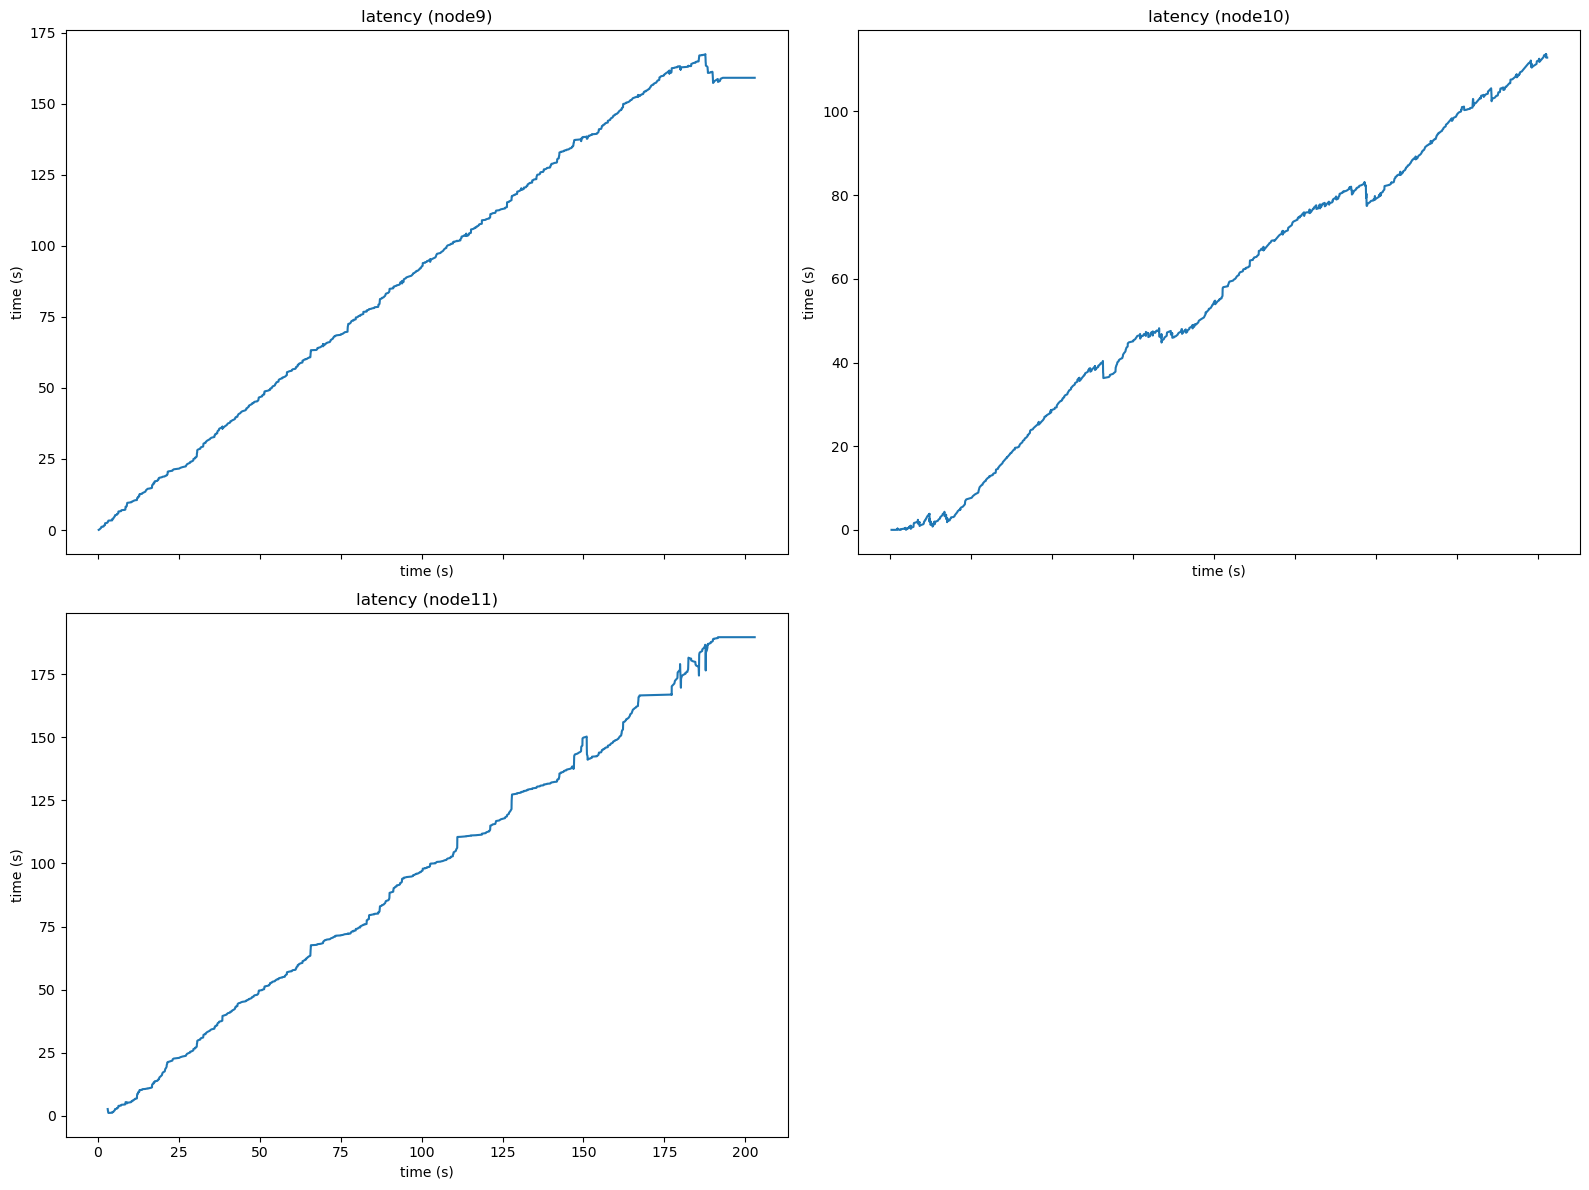

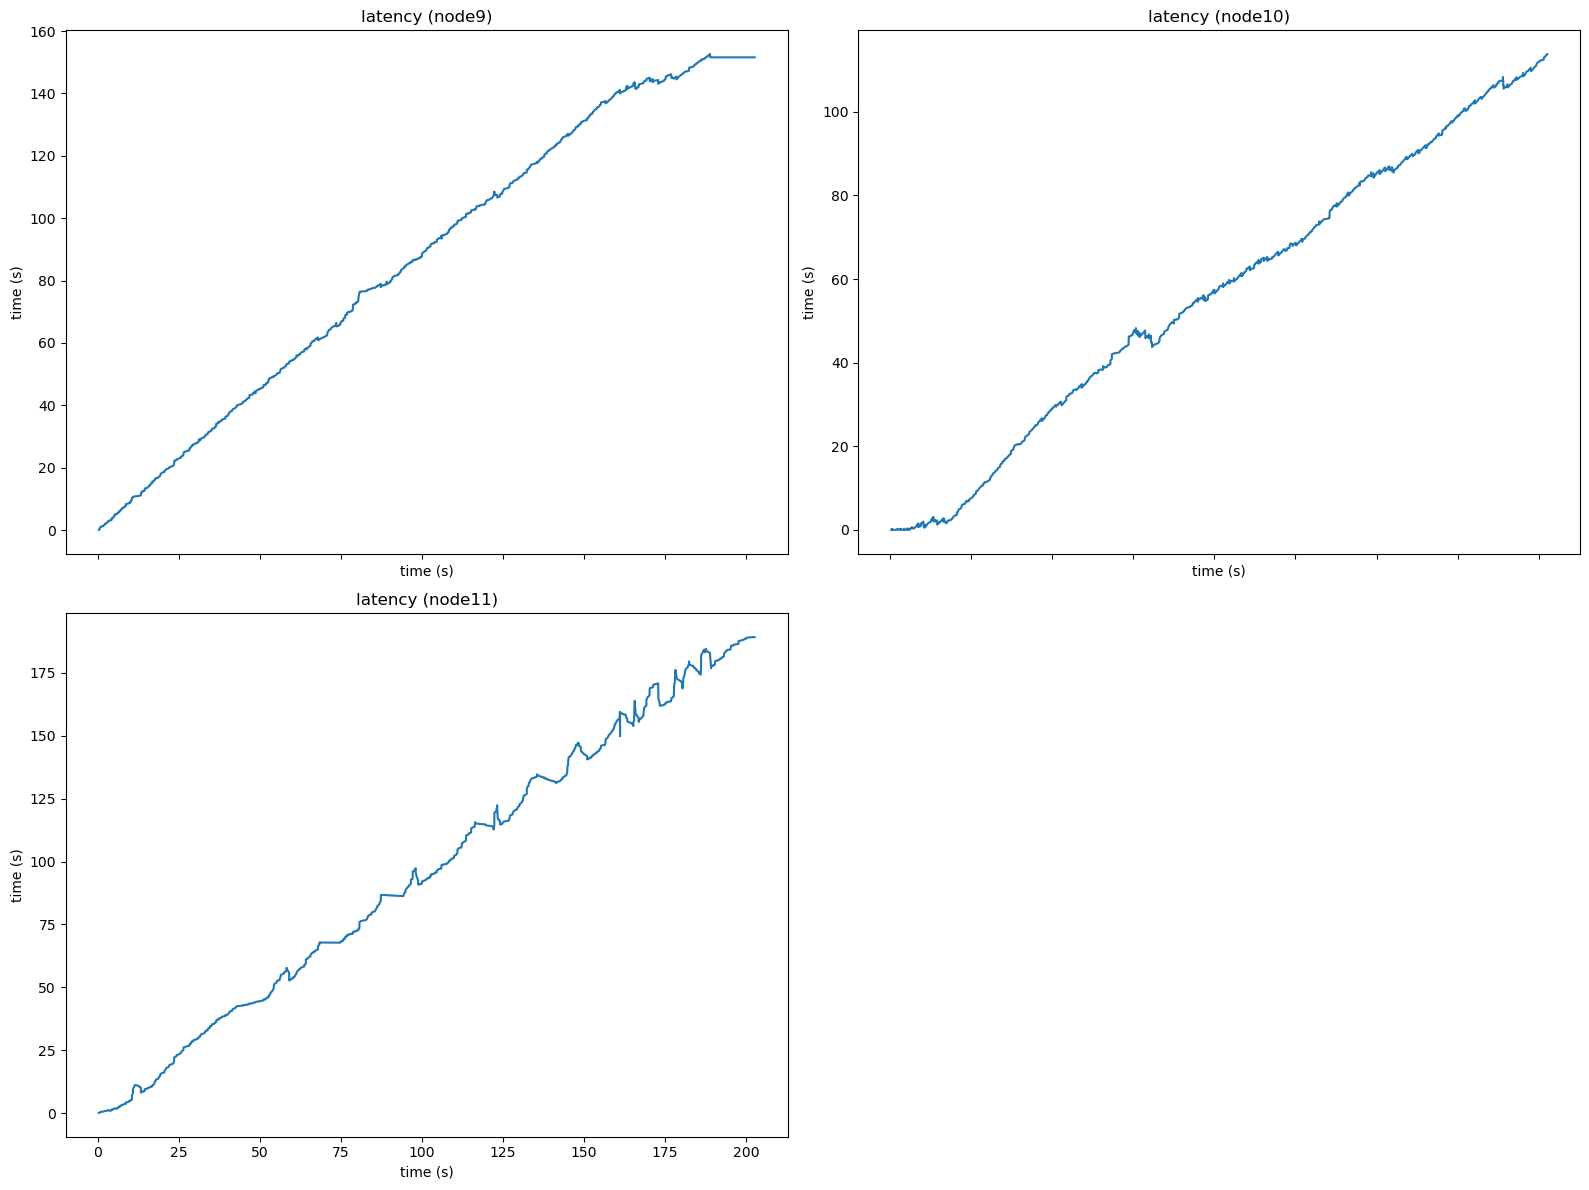

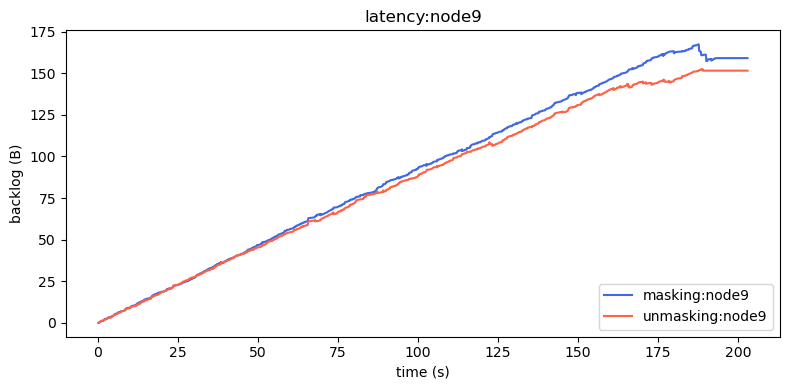

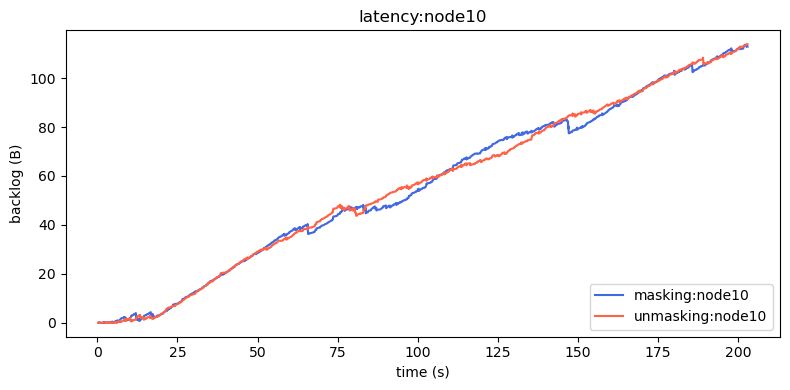

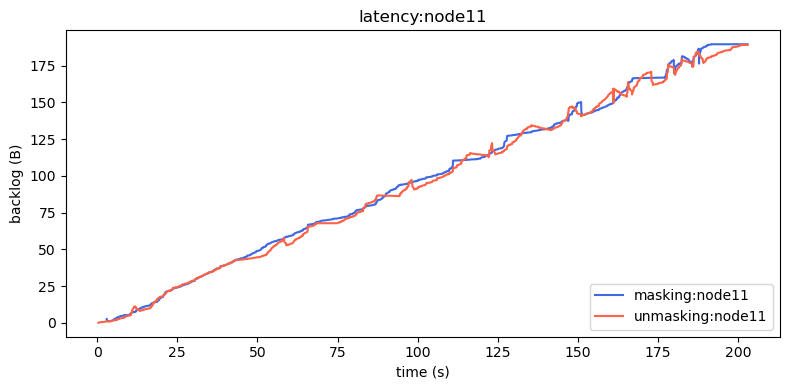

In [12]:
lrlo.plot_each_latency(latency_masking_df)
lrlo.plot_each_latency(latency_unmasking_df)
lrlo.plot_each_comparison_latency([latency_masking_df, latency_unmasking_df])

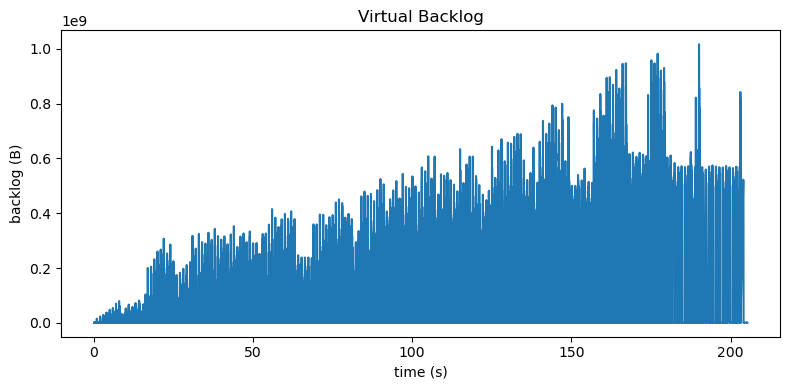

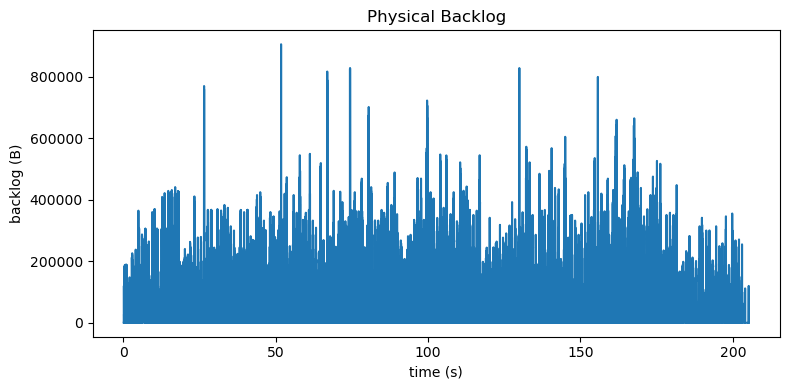

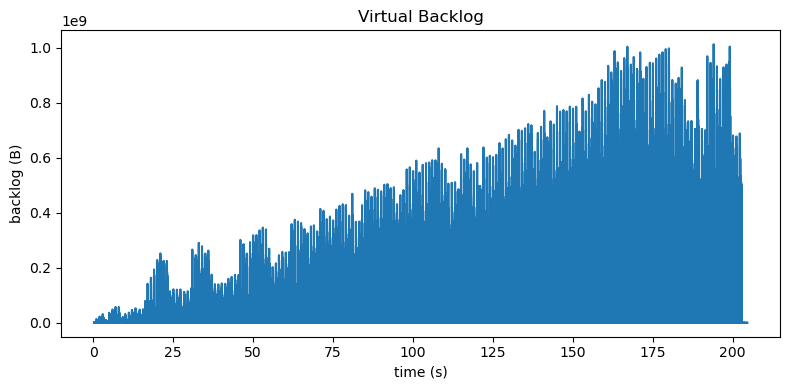

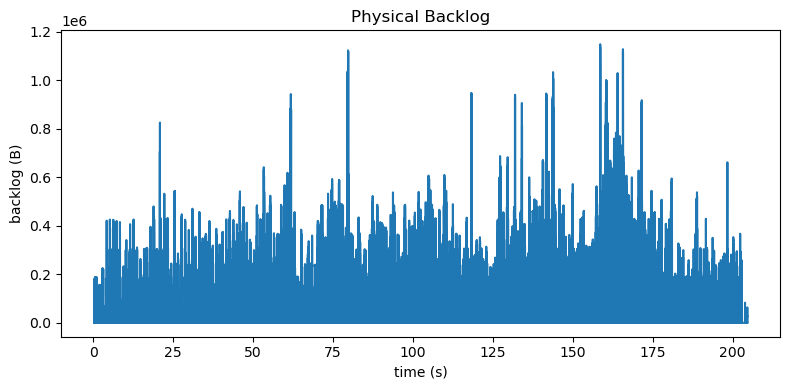

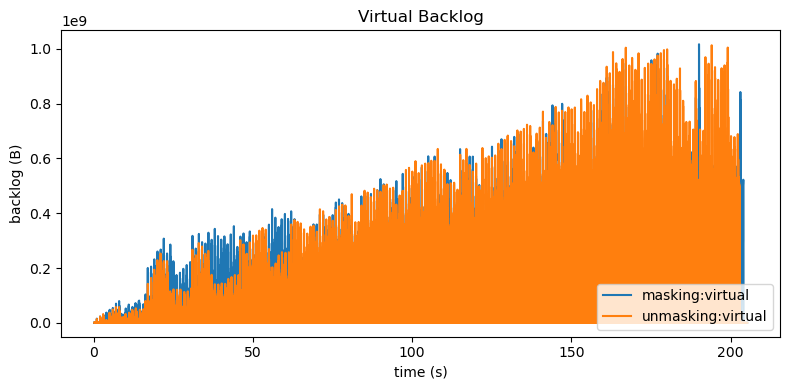

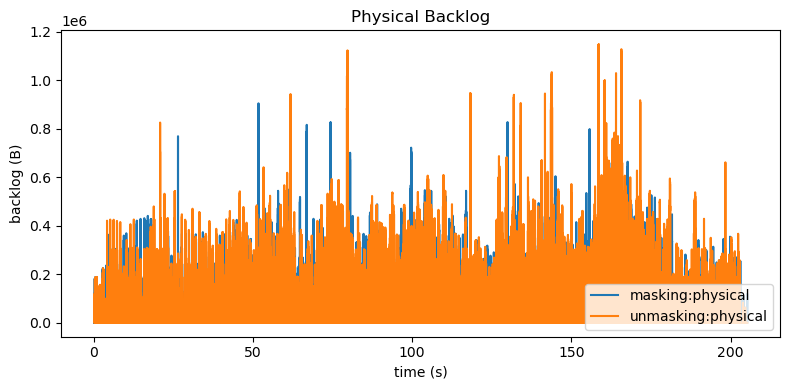

In [13]:
lrlo.plot_backlog(sum_masking_df)
lrlo.plot_backlog(sum_unmasking_df)

lrlo.plot_comparison_backlog([sum_masking_df, sum_unmasking_df])

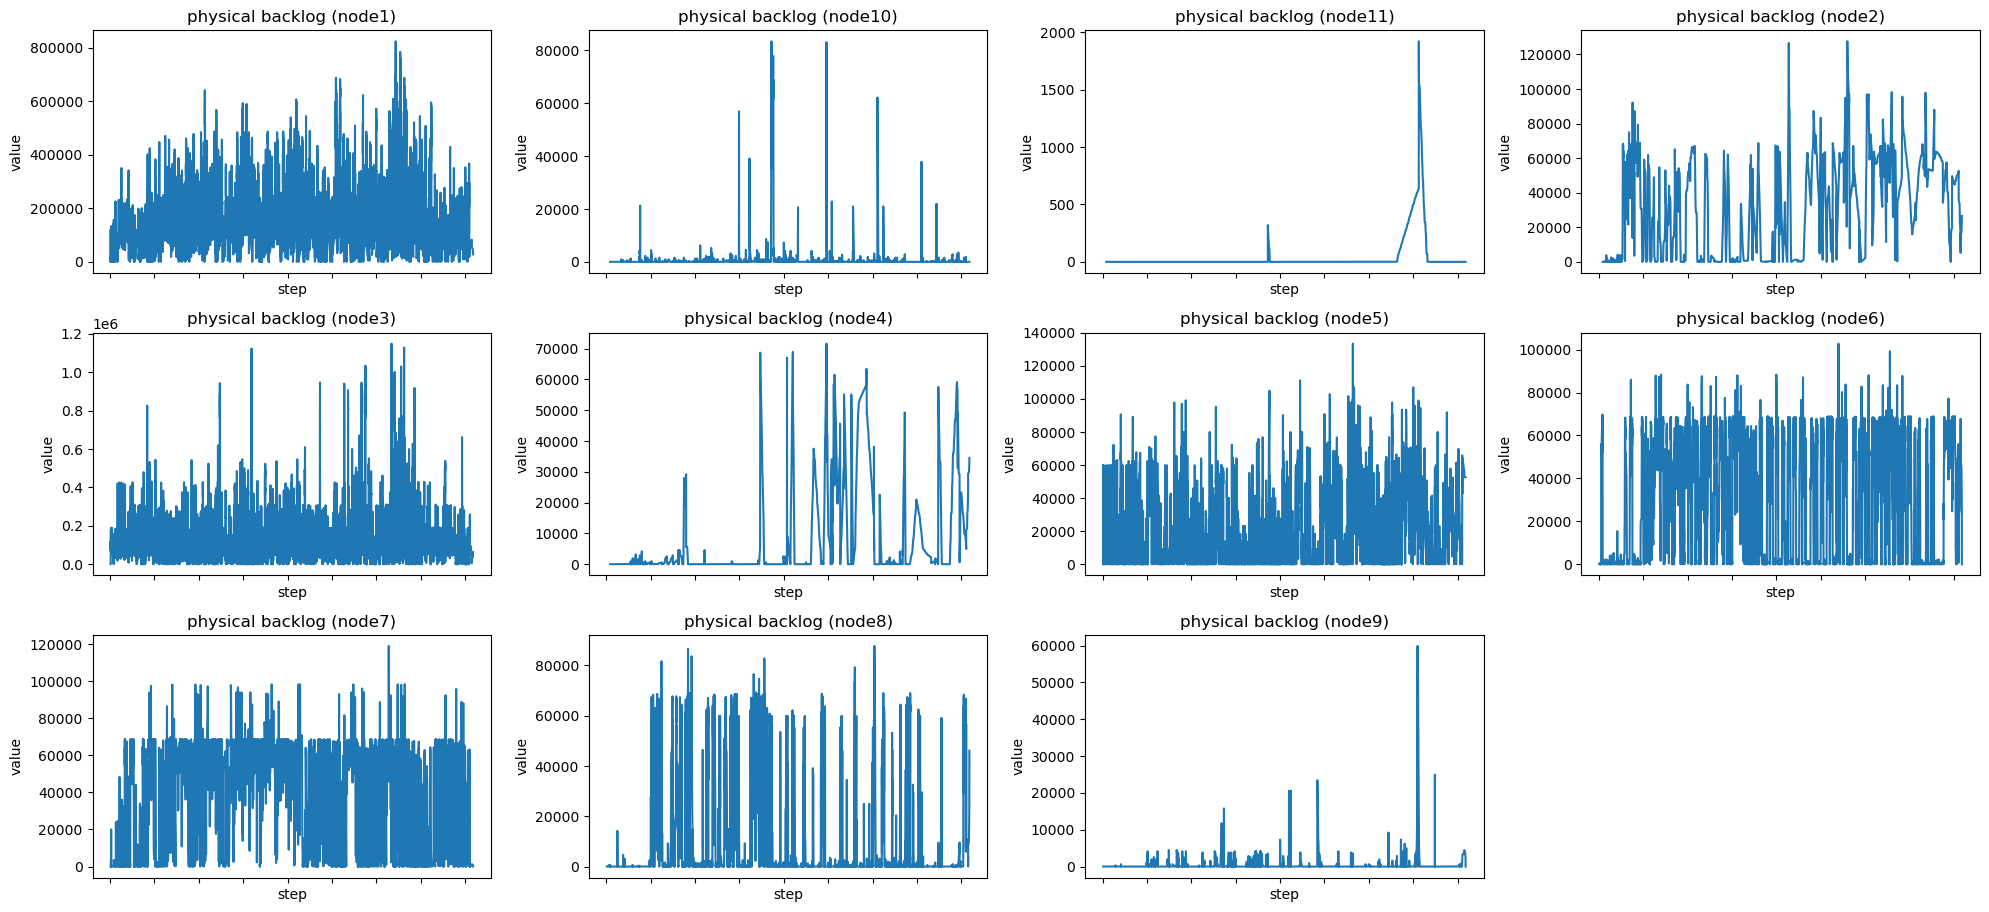

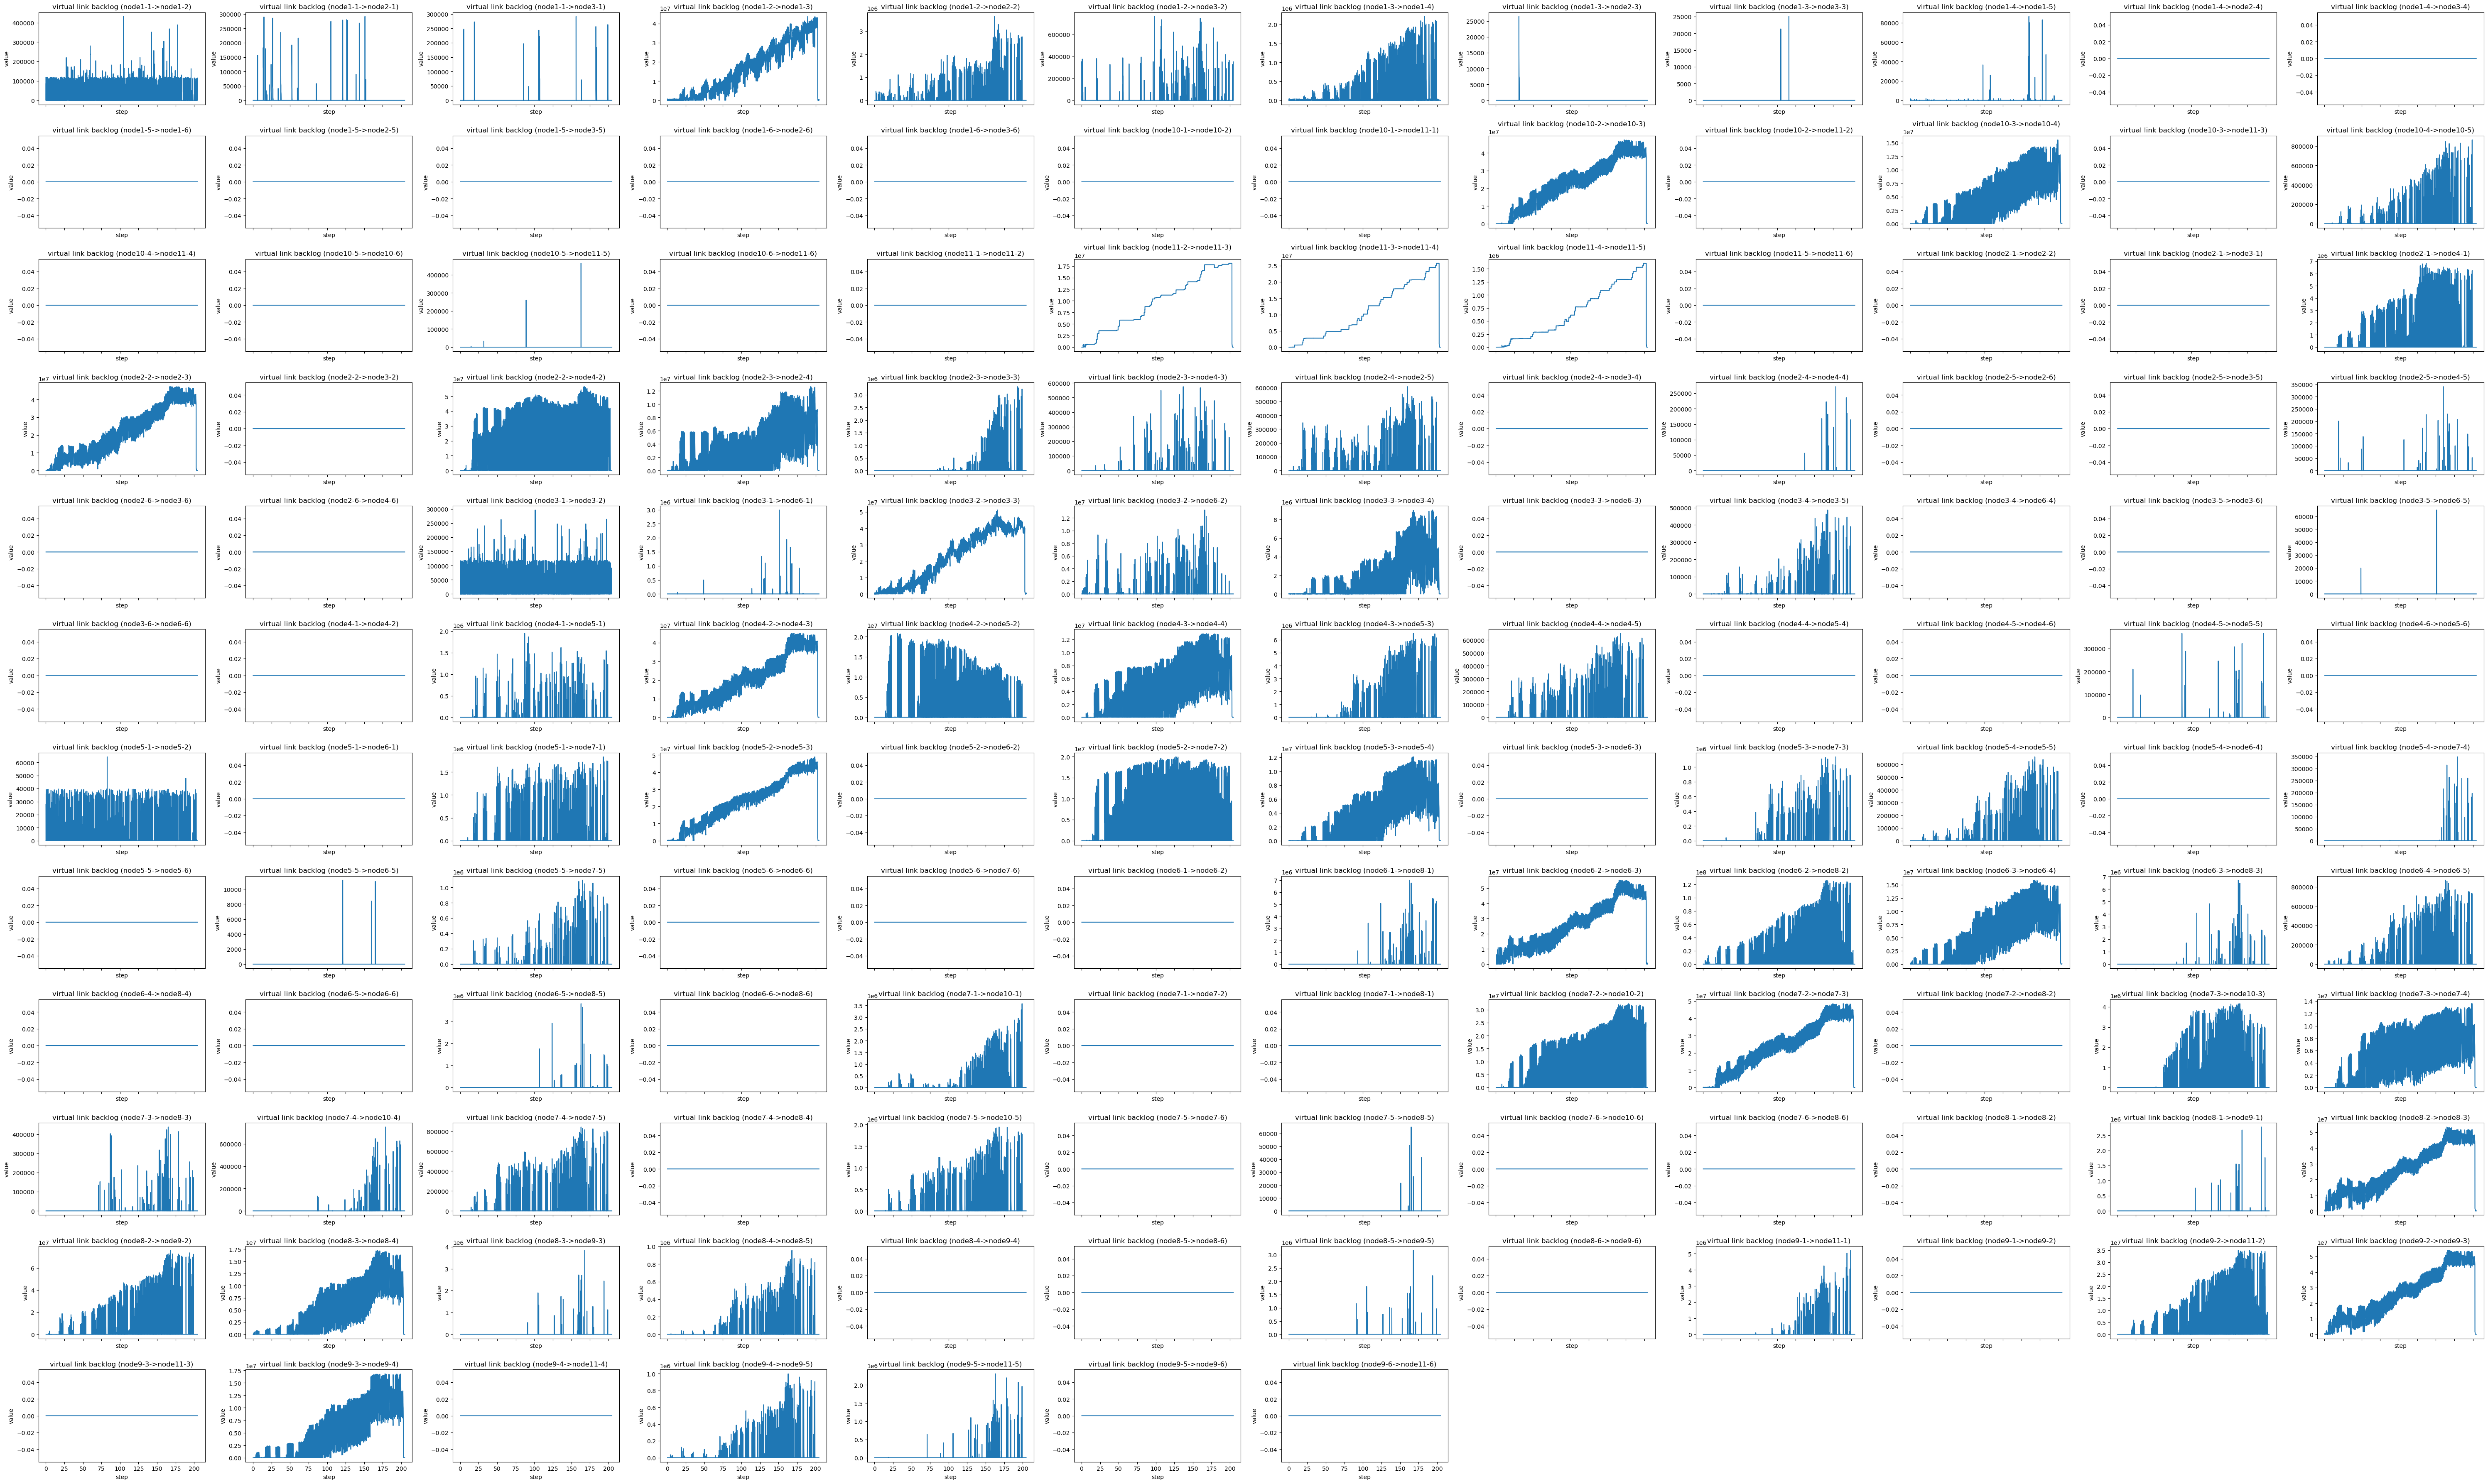

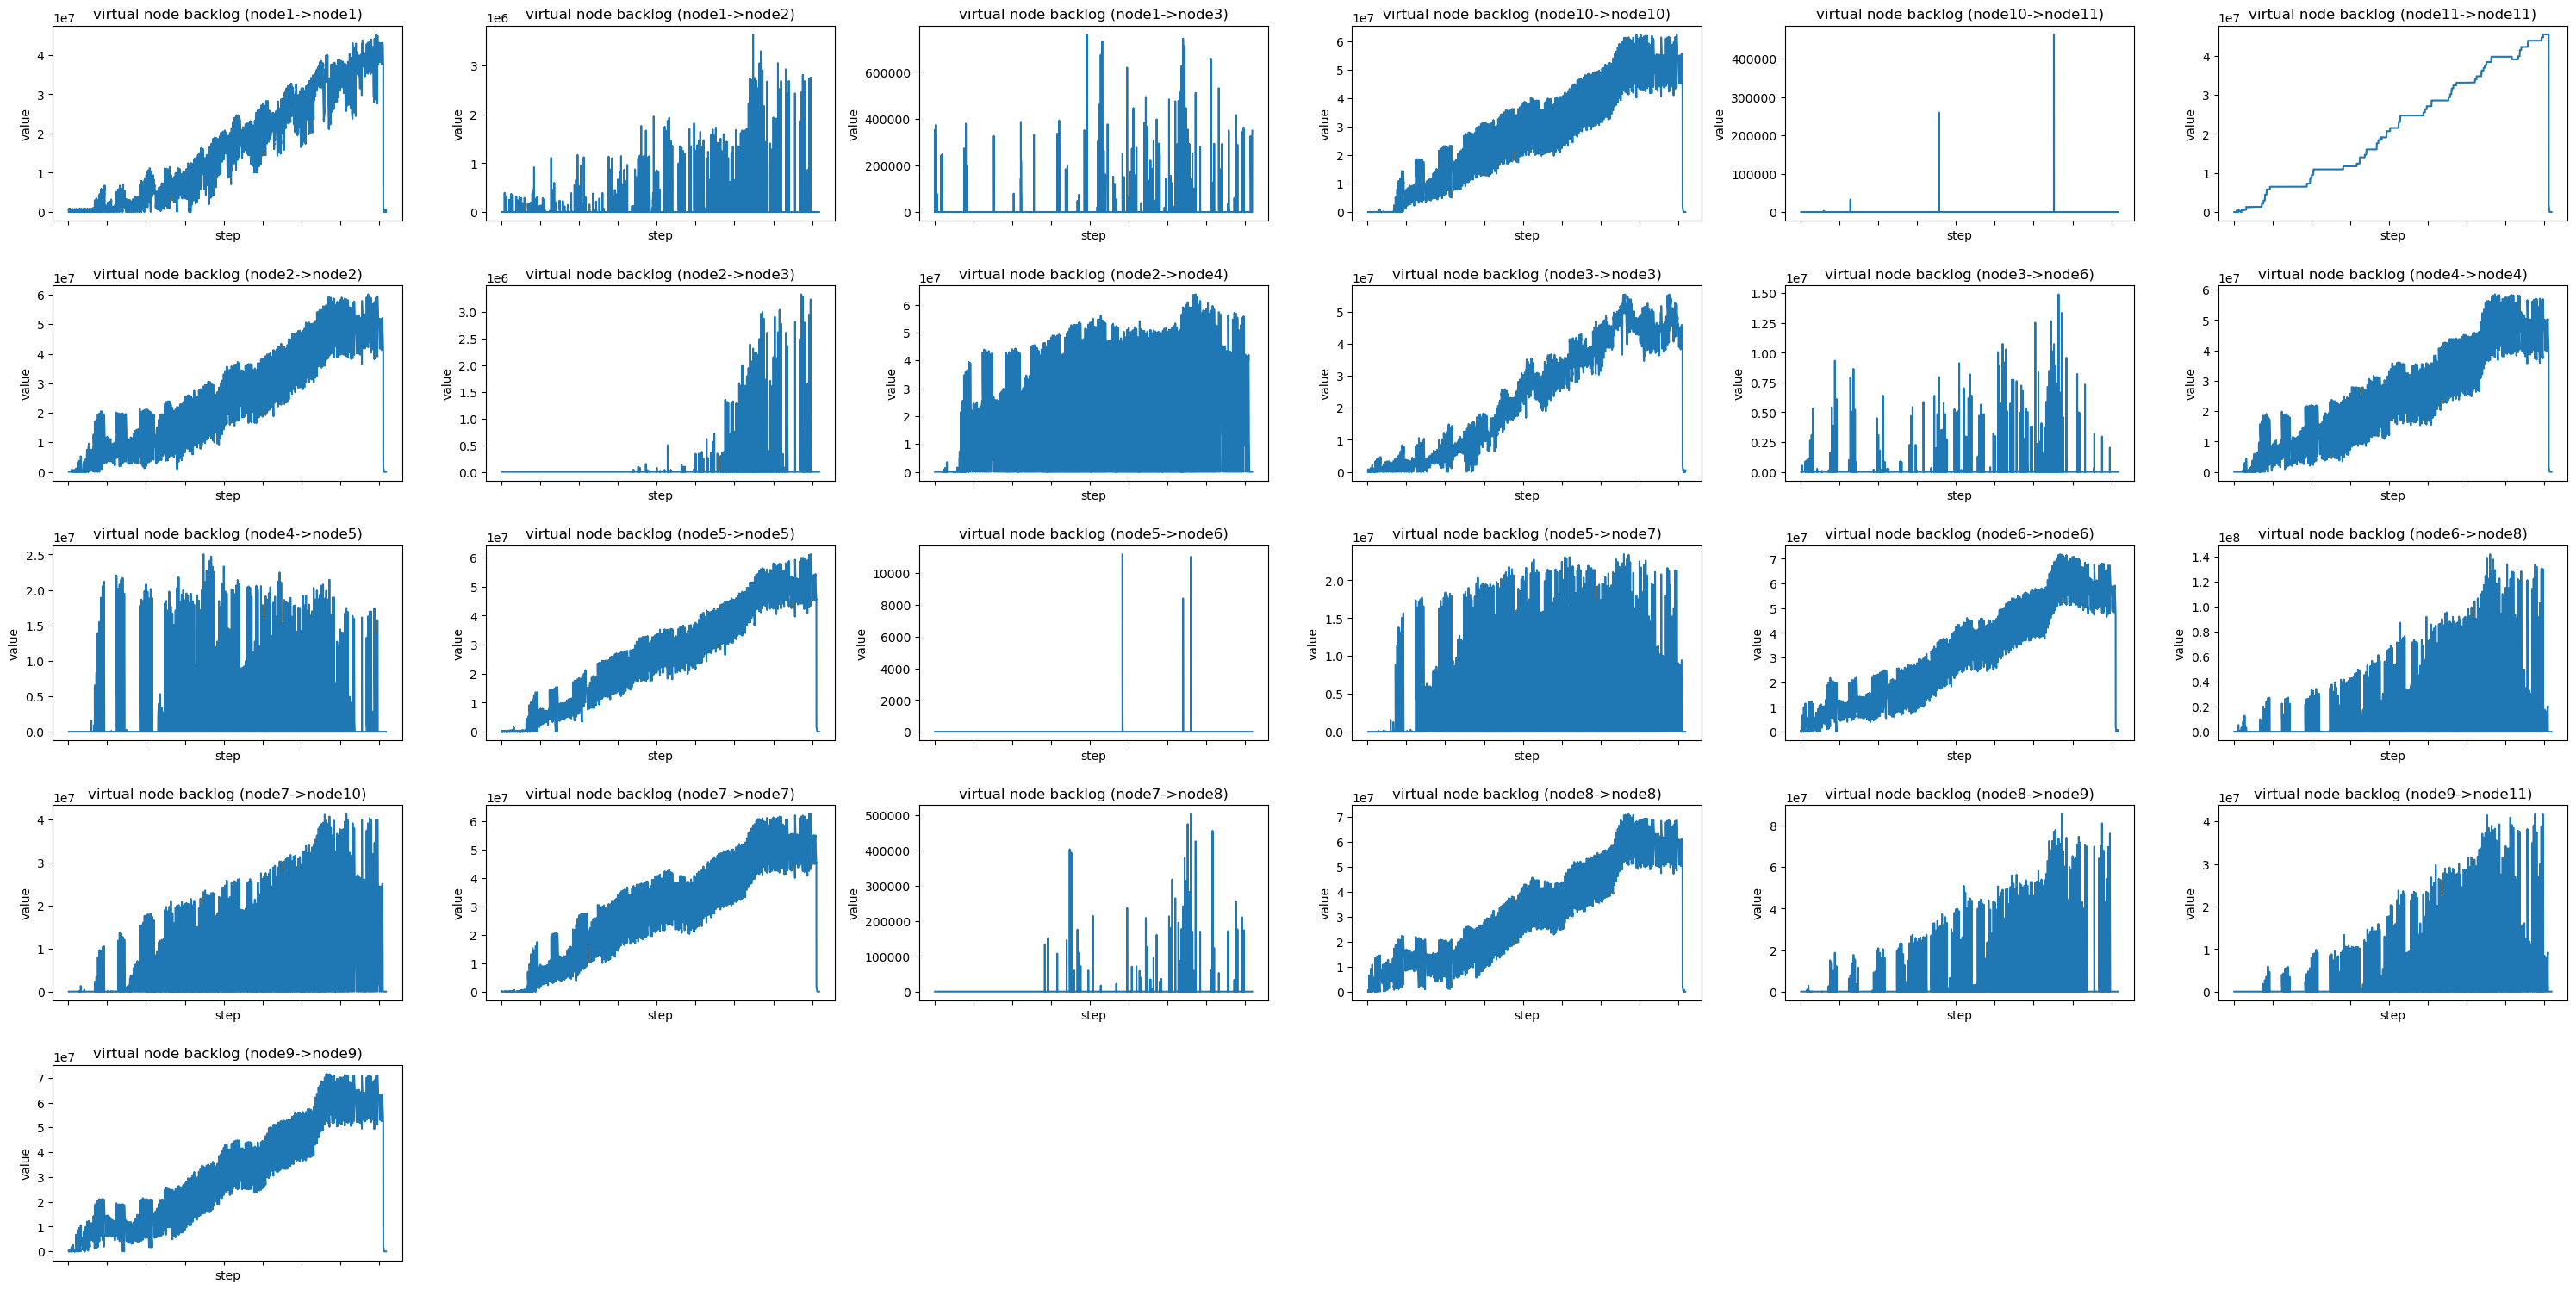

In [14]:
lrlo.plot_each_backlog(backlog_unmasking_df)